In [3]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hashlib
import re
def remove_whitespaces(s: str):
    return re.sub(r'\s+', '', s)

sns.set_context("paper", font_scale=3)
sns.set_palette("deep")
color_palette = sns.color_palette()
color_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [4]:
# const GLenum POINTS                         = 0x0000;
# const GLenum LINES                          = 0x0001;
# const GLenum LINE_LOOP                      = 0x0002;
# const GLenum LINE_STRIP                     = 0x0003;
# const GLenum TRIANGLES                      = 0x0004;
# const GLenum TRIANGLE_STRIP                 = 0x0005;
# const GLenum TRIANGLE_FAN                   = 0x0006;
gl_types = {
    0: "POINTS",
    1: "LINES",
    2: "LINE_LOOP",
    3: "LINE_STRIP",
    4: "TRIANGLES",
    5: "TRIANGLE_STRIP",
    6: "TRIANGLE_FAN",
}

In [5]:
# df_frame = pd.read_pickle('imr/0501-df_frame-raf.pkl.zst', compression='zstd')
# df_context = pd.read_pickle('imr/0501-df_context.pkl.zst', compression='zstd')
df_context_noraf = pd.read_pickle('imr/0504-df_context-noraf.pkl.zst', compression='zstd')
df_context_noraf = df_context_noraf[df_context_noraf['label_ERROR'].isna() | (df_context_noraf['label_ERROR'] == 0)]
# df_shader = pd.read_pickle('imr/0501-df_shader-noraf.pkl.zst', compression='zstd')

In [6]:
df_context_noraf.columns.to_list()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
 'frame.

In [7]:
df_context_noraf['frame.counter.usedWebGL'].isna().sum()

0

In [8]:
df_context_noraf['url'].nunique()

15610

In [9]:
df_context_noraf.shape

(34026, 359)

In [10]:
# print("Frame shape:", df_frame.shape)
print("Context shape:", df_context_noraf.shape)

Context shape: (34026, 359)


In [11]:
def url_essential(x):
    if x.startswith('http://'):
        x = x[7:]
    if x.startswith('https://'):
        x = x[8:]
    return x.strip('/')

In [12]:
func_count_list = [x for x in df_context_noraf.columns.to_list() if x.startswith('frame.context.maghsk.counter.funcCount.')]
func_count_list

['frame.context.maghsk.counter.funcCount.getShaderPrecisionFormat',
 'frame.context.maghsk.counter.funcCount.getParameter',
 'frame.context.maghsk.counter.funcCount.getExtension',
 'frame.context.maghsk.counter.funcCount.createTexture',
 'frame.context.maghsk.counter.funcCount.bindTexture',
 'frame.context.maghsk.counter.funcCount.texParameteri',
 'frame.context.maghsk.counter.funcCount.texImage2D',
 'frame.context.maghsk.counter.funcCount.texImage3D',
 'frame.context.maghsk.counter.funcCount.clearColor',
 'frame.context.maghsk.counter.funcCount.clearDepth',
 'frame.context.maghsk.counter.funcCount.clearStencil',
 'frame.context.maghsk.counter.funcCount.enable',
 'frame.context.maghsk.counter.funcCount.depthFunc',
 'frame.context.maghsk.counter.funcCount.frontFace',
 'frame.context.maghsk.counter.funcCount.cullFace',
 'frame.context.maghsk.counter.funcCount.getContextAttributes',
 'frame.context.maghsk.counter.funcCount.viewport',
 'frame.context.maghsk.counter.funcCount.createBuffer',

In [13]:
df_context_noraf

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1683354276886,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,114602,29224,[bq],0,1,0,,https://zurstrass.com/,1683423145038,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34852,114614,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34853,114614,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34854,114622,29235,[bq],0,1,0,,https://ggk.kz/,1683423178451,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_context_noraf.duplicated(subset='idx', keep='first')

0        False
1        False
2         True
3         True
4         True
         ...  
34851     True
34852    False
34853     True
34854    False
34855    False
Length: 34026, dtype: bool

In [15]:
# # tmp = df_context_noraf
# tmp = df_context_noraf.duplicated(subset='idx', keep='first')
# tmp = tmp[tmp['frame.url'].map(lambda x: url_essential(x.strip())) != tmp['url'].map(lambda x: url_essential(x.strip()))]
# tmp[tmp[func_count_list].sum(axis=1) > 100][['url', 'frame.url']]

In [16]:
df_context_noraf = df_context_noraf[df_context_noraf[func_count_list].sum(axis=1) > 0]
print("U_w =", df_context_noraf.idx.nunique())
print("F_w =", df_context_noraf['idx-frame'].nunique())
print("C_w =", len(df_context_noraf))
df_context_noraf

U_w = 12034
F_w = 14559
C_w = 26662


,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.createArguments.1.stencilBuffer,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt
0,0,0,[bq],0,1,0,,http://0ldsk00l.ca/,1683354276886,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,[bq],0,3,0,,http://1000000-lives.com/,1683354282774,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,114602,29224,[bq],0,1,0,,https://zurstrass.com/,1683423145038,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34852,114614,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34853,114614,29230,[bq],0,1,0,,https://zycieczestochowy.pl/wydanie-9-05-2022/,1683422963723,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34854,114622,29235,[bq],0,1,0,,https://ggk.kz/,1683423178451,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
tmp = df_context_noraf.drop_duplicates(subset=['idx'])[['label_ERROR', 'label_usecase', 'label_interactions', 'label_comments']]
for col in tmp.columns:
    # print(col)
    print(tmp[col].value_counts())
    print()

label_ERROR
0    11821
Name: count, dtype: Int64

label_usecase
1    10040
3     1609
4      138
2       39
Name: count, dtype: Int64

label_interactions
0    10512
1     1311
Name: count, dtype: Int64

label_comments
                  10656
scroll              474
File not found      423
TODO                291
waiting             167
Name: count, dtype: Int64



In [18]:
translate = {
    'bq': 'HTTP Archive',
    'awwwards': 'Crawling/Galleries',
    'tranco': 'Crawling/Top list',
    'cssdesign': 'Crawling/Galleries',
    'threejs': 'Crawling/Galleries',
    'tfjs_gallery': 'Crawling/Galleries',
    'googleart': 'Crawling/Galleries',
    'custom': 'Crawling/Galleries',
    'david': 'Crawling/Galleries',
}
df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])

/tmp/ipykernel_2833632/3740266323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_context_noraf['data source'] = df_context_noraf['category'].map(lambda x: [translate[y] for y in x])


In [19]:
# HTTP Archive          20906
# Crawling/Galleries     4786
# Crawling/Top list      3489

In [20]:
data_sources = ['HTTP Archive','Crawling/Galleries','Crawling/Top list']
for data_source in data_sources:
    tmp = df_context_noraf[df_context_noraf['data source'].map(lambda x: data_source in x)]
    print(data_source, tmp['idx'].nunique(), tmp['idx-frame'].nunique(), tmp.shape[0])

HTTP Archive 9279 11603 21316
Crawling/Galleries 2217 2266 3830
Crawling/Top list 636 789 1721


In [21]:
df_context_noraf['idx-frame'].value_counts().describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    14559.000000
mean         1.831307
std          1.461078
min          1.000000
50%          1.000000
75%          2.000000
90%          4.000000
95%          4.000000
99%          7.000000
max         35.000000
Name: count, dtype: float64

In [22]:
df_context_noraf['idx-frame'].value_counts()

idx-frame
6757      35
75588     26
77262     20
38516     20
107236    20
          ..
45282      1
45283      1
45327      1
45330      1
114625     1
Name: count, Length: 14559, dtype: int64

In [23]:
df_context_noraf[df_context_noraf['idx-frame']==6757].to_excel('tmp.xlsx')

## extensions

In [24]:
print("Canvas count:", df_context_noraf.dropna(subset=['frame.context.maghsk.createArguments.0']).shape[0])

Canvas count: 26662


In [25]:
from collections import defaultdict

In [26]:
with open('input/webgl-extension-categories.json', 'r') as fp:
    category_to_extension = json.load(fp)

extension_to_category = defaultdict(lambda: 'unknown')
for category, extensions in category_to_extension.items():
    for extension in extensions:
        extension_to_category[extension] = category

In [27]:
tmp = df_context_noraf[['frame.context.maghsk.createArguments.0', 'frame.context.maghsk.extensions']].dropna()
tmp['frame.context.maghsk.extensions'] = tmp['frame.context.maghsk.extensions'].apply(lambda x: len(set(x)))
tmp.rename(columns={'frame.context.maghsk.createArguments.0': 'type', 'frame.context.maghsk.extensions': 'extension_count'}, inplace=True)
tmp['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)

In [28]:
tmp['extension_count'].value_counts()

extension_count
1     7492
0     5182
9     2577
2     2554
4     1667
8     1453
5      950
3      901
14     741
6      558
11     432
12     403
7      386
10     266
15     255
13     236
20     110
25      83
22      69
18      65
23      62
19      58
29      53
17      43
21      37
16      14
31       6
27       2
96       2
34       2
33       1
26       1
28       1
Name: count, dtype: int64

In [29]:
# count zero of extension_count
1 - (tmp['extension_count'].value_counts() / len(tmp))

extension_count
1     0.719001
0     0.805641
9     0.903346
2     0.904208
4     0.937477
8     0.945503
5     0.964369
3     0.966207
14    0.972208
6     0.979071
11    0.983797
12    0.984885
7     0.985522
10    0.990023
15    0.990436
13    0.991148
20    0.995874
25    0.996887
22    0.997412
18    0.997562
23    0.997675
19    0.997825
29    0.998012
17    0.998387
21    0.998612
16    0.999475
31    0.999775
27    0.999925
96    0.999925
34    0.999925
33    0.999962
26    0.999962
28    0.999962
Name: count, dtype: float64

(0.0, 40.0)

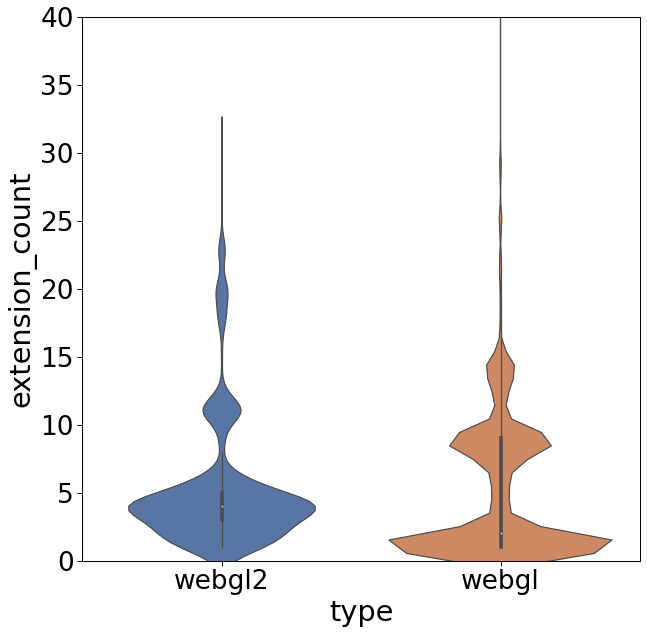

In [30]:
# show the distribution of extension_count of each context TYPE
plt.figure(figsize=(10, 10))
# sns.barplot(data=tmp, x="type", y="extension_count")
# sns.boxplot(data=tmp, x="type", y="extension_count")
sns.violinplot(data=tmp[tmp['extension_count'] > 0], x="type", y="extension_count")
plt.ylim(0, 40)

<Axes: xlabel='used extension', ylabel='type'>

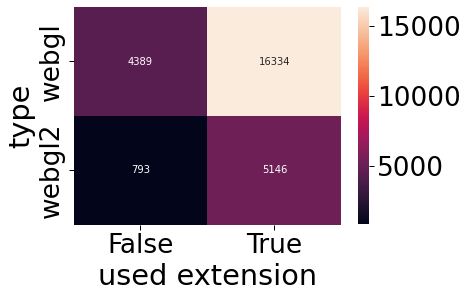

In [31]:
tmpa = tmp.copy()
tmpa['used extension'] = tmpa['extension_count'].apply(lambda x: x > 0)
sns.heatmap(tmpa.groupby(['type', 'used extension']).size().unstack(), annot=True, fmt='d')

In [32]:
df_ext = df_context_noraf[['frame.context.maghsk.extensions', 'frame.context.maghsk.createArguments.0', 'idx']].dropna()
df_ext = df_ext.rename(columns={'frame.context.maghsk.extensions': 'extensions', 'frame.context.maghsk.createArguments.0': 'type'})
df_ext['type'].replace({'experimental-webgl': 'webgl'}, inplace=True)
df_ext['extensions'] = df_ext['extensions'].apply(lambda x: list(set(x)))
df_ext

,extensions,type,idx
0,"[EXT_color_buffer_float, EXT_color_buffer_half...",webgl2,0
1,[WEBGL_lose_context],webgl,2
2,[],webgl2,2
3,"[EXT_color_buffer_float, OES_texture_float_lin...",webgl2,2
4,"[EXT_color_buffer_float, OES_texture_float_lin...",webgl2,2
...,...,...,...
34851,[],webgl,29224
34852,[],webgl,29230
34853,"[WEBGL_depth_texture, OES_texture_float, OES_e...",webgl,29230
34854,"[WEBGL_debug_shaders, WEBGL_depth_texture, KHR...",webgl,29235


In [33]:
df_ext_e = df_ext.explode('extensions').dropna().reset_index(drop=False).rename(columns={'index': 'idx-context'})
df_ext_e['extensions'] = df_ext_e['extensions'].str.lower()
set(df_ext_e['extensions'].tolist())

{'angle_instanced_arrays',
 'ext_blend_minmax',
 'ext_color_buffer_float',
 'ext_color_buffer_float_linear',
 'ext_color_buffer_half_float',
 'ext_disjoint_timer_query',
 'ext_disjoint_timer_query_webgl2',
 'ext_draw_buffers',
 'ext_float_blend',
 'ext_frag_depth',
 'ext_multisampled_render_to_texture',
 'ext_polygon_offset_clamp',
 'ext_shader_texture_lod',
 'ext_srgb',
 'ext_texture_compression_bptc',
 'ext_texture_compression_rgtc',
 'ext_texture_filter_anisotropic',
 'ext_texture_norm16',
 'gl_img_texture_compression_pvrtc',
 'gl_oes_standard_derivatives',
 'img_texture_compression_pvrtc',
 'khr_parallel_shader_compile',
 'moz_angle_instanced_arrays',
 'moz_ext_blend_minmax',
 'moz_ext_color_buffer_half_float',
 'moz_ext_disjoint_timer_query',
 'moz_ext_srgb',
 'moz_ext_texture_filter_anisotropic',
 'moz_oes_standard_derivatives',
 'moz_oes_texture_half_float',
 'moz_oes_texture_half_float_linear',
 'moz_oes_vertex_array_object',
 'moz_webgl_color_buffer_float',
 'moz_webgl_compres

In [34]:
unsupported_extension_keywords = ['_bptc','_pvrtc','_rgtc','_s3tc','debug_renderer','disjoint_timer_query','lose_context','multiview','provoking_vertex']
df_ext['unsupported'] = df_ext['extensions'].apply(lambda exts: any([kwd in ext for kwd in unsupported_extension_keywords for ext in exts]))
df_ext.idx.nunique()

12034

In [35]:
df_ext[df_ext['unsupported'] == True].idx.nunique()

4973

In [36]:
df_ext['unsupported'].value_counts()

unsupported
False    15700
True     10962
Name: count, dtype: int64

In [37]:
df_ext_e

,idx-context,extensions,type,idx
0,0,ext_color_buffer_float,webgl2,0
1,0,ext_color_buffer_half_float,webgl2,0
2,0,oes_texture_float_linear,webgl2,0
3,0,webgl_multisampled_render_to_texture,webgl2,0
4,1,webgl_lose_context,webgl,2
...,...,...,...,...
110445,34855,webgl_multi_draw,webgl,29238
110446,34855,oes_fbo_render_mipmap,webgl,29238
110447,34855,webgl_compressed_texture_s3tc_srgb,webgl,29238
110448,34855,oes_element_index_uint,webgl,29238


In [38]:
for kwd in unsupported_extension_keywords:
    print(kwd, df_ext_e[df_ext_e.extensions.str.contains(kwd)].idx.nunique())

_bptc 469
_pvrtc 885
_rgtc 96
_s3tc 1645
debug_renderer 3277
disjoint_timer_query 726
lose_context 1583
multiview 258
provoking_vertex 65


### weird

In [40]:
df_weird = df_context_noraf.loc[df_context_noraf.index.isin(df_ext_e[df_ext_e['extensions'] == 'webgl_debug_renderer_info']['idx-context'])]

In [41]:
a = df_weird[[x for x in df_weird.columns if x.startswith('frame.context.maghsk.counter.funcCount')]].sum(axis=1)
print(len(a))

6087


In [42]:
print((a < 7).sum() / len(a))
print((a < 7).sum())

0.7545588960078856
4593


In [43]:
print(df_weird['frame.context.maghsk.shaders'].str.len().value_counts())

frame.context.maghsk.shaders
0      5046
2       424
16       91
92       59
14       58
       ... 
72        1
110       1
296       1
53        1
246       1
Name: count, Length: 61, dtype: int64


In [44]:
print(df_weird[a<7]['frame.context.maghsk.shaders'].str.len().value_counts())

frame.context.maghsk.shaders
0    4593
Name: count, dtype: int64


In [45]:
df_ext_e.groupby('extensions').nunique().to_csv('extensions_usage.csv')
print(df_ext_e['idx-context'].nunique())

21480


In [46]:
df_ext_e[df_ext_e['extensions']=='ovr_multiview2']['idx-context'].nunique() / df_ext_e['idx-context'].nunique()

0.013361266294227188

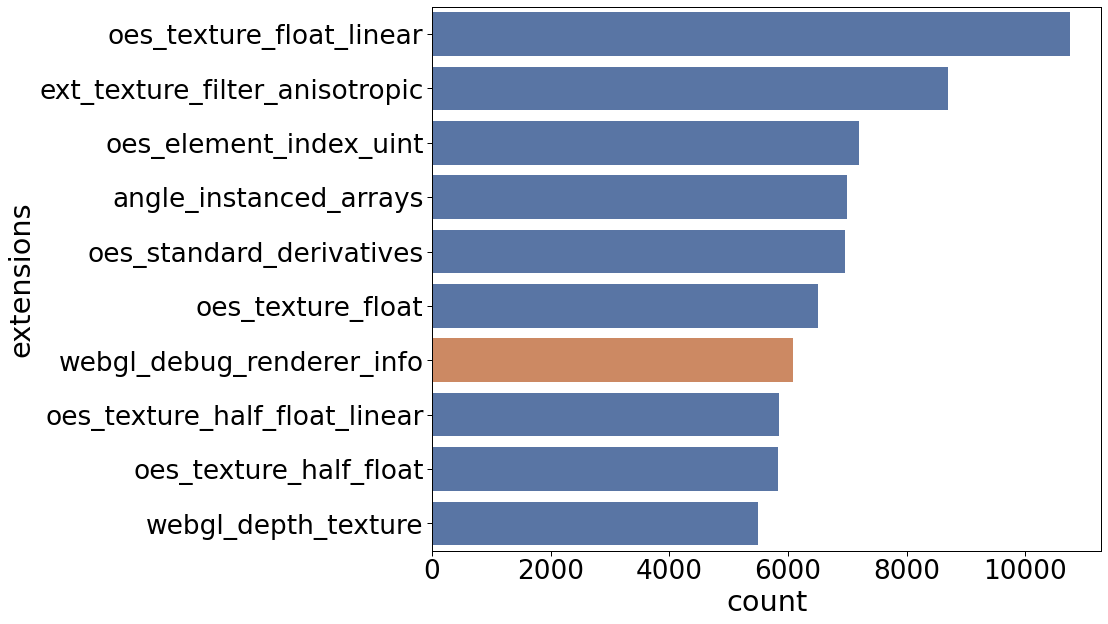

In [47]:
plt.figure(figsize=(12, 10))

# Get the top 20 values based on their counts
tmp = df_ext_e['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*6+[color_palette[1]]+[color_palette[0]]*3)
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

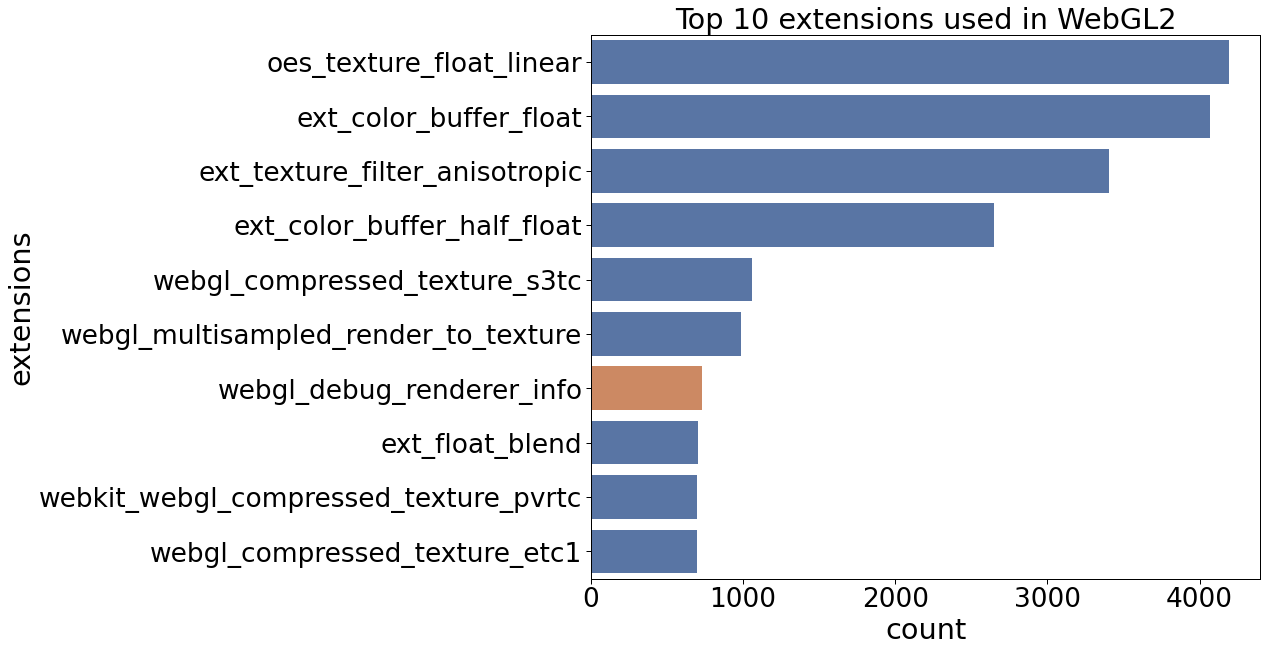

In [48]:
plt.figure(figsize=(12, 10))

tmp = df_ext_e[df_ext_e['type'] == 'webgl2']['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*6+[color_palette[1]]+[color_palette[0]]*3)
plt.title('Top 10 extensions used in WebGL2')
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

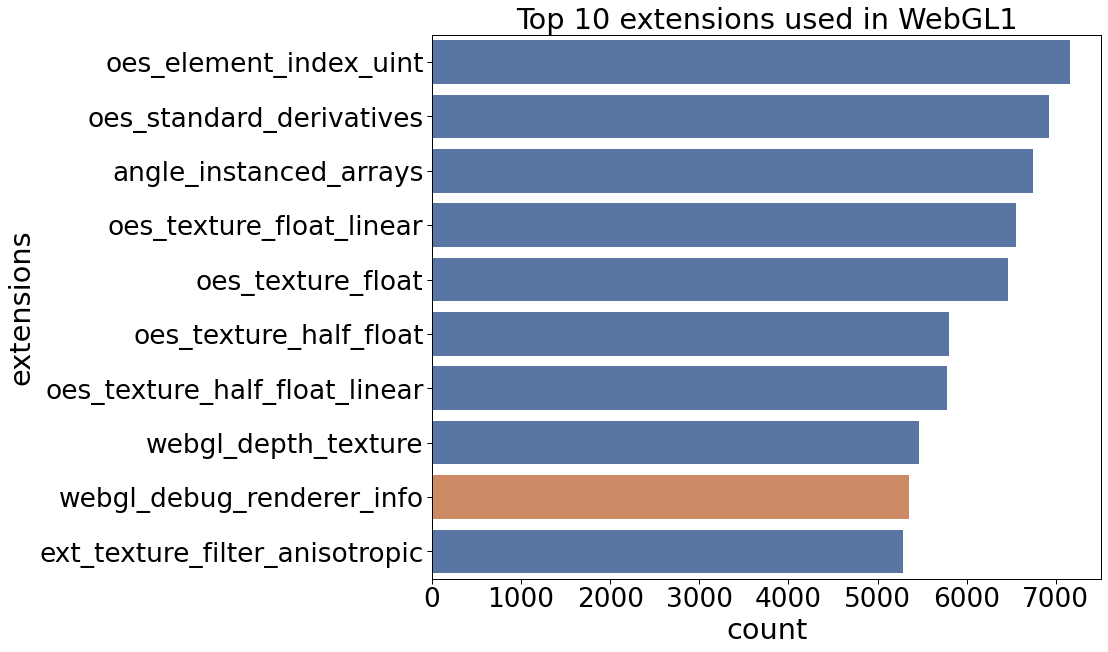

In [49]:
plt.figure(figsize=(12, 10))

tmp = df_ext_e[df_ext_e['type'] == 'webgl']['extensions']
top_20 = tmp.value_counts().nlargest(10).sort_values(ascending=False)

# Create the count plot
sns.countplot(y=tmp[tmp.isin(top_20.index)], order=top_20.index, palette=[color_palette[0]]*8+[color_palette[1]]+[color_palette[0]]*1)
plt.title('Top 10 extensions used in WebGL1')
plt.savefig('fig/results_context_extensions.pdf', bbox_inches='tight')

## Context Attributes & Create Arguments

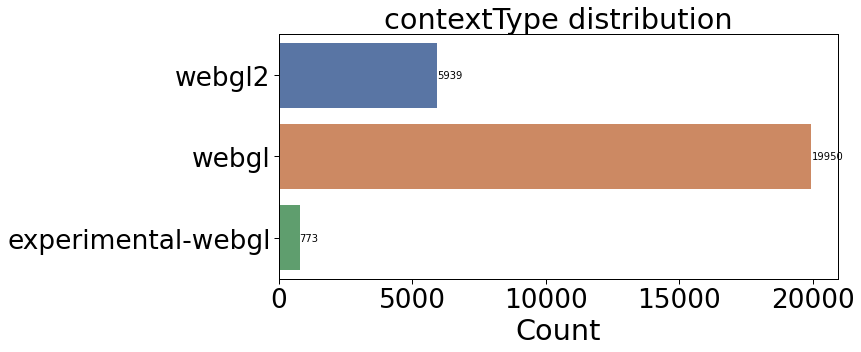

In [39]:
# df_context_noraf["frame.context.maghsk.createArguments.0"].value_counts()
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(y="frame.context.maghsk.createArguments.0", data=df_context_noraf, ax=axes)
axes.set_xlabel('Count')
axes.set_ylabel('')
axes.set_title('contextType distribution')
for rect in axes.patches:
    axes.annotate(f'{rect.get_width():.0f}', (rect.get_width(), rect.get_y()+rect.get_height()/2), ha='left', va='center')
plt.tight_layout()
plt.savefig('fig/results_raf_contextType.pdf', bbox_inches='tight')

In [50]:
df_context_noraf.groupby('idx')["frame.context.maghsk.createArguments.0"].unique().explode().value_counts()

frame.context.maghsk.createArguments.0
webgl                 8787
webgl2                3937
experimental-webgl     596
Name: count, dtype: int64

In [51]:
df_context_noraf.columns.tolist()

['idx-frame',
 'idx',
 'category',
 'label_ERROR',
 'label_usecase',
 'label_interactions',
 'label_comments',
 'url',
 'date',
 'netIdleTimeout',
 'raf_path',
 'url_essential',
 'frame.url',
 'frame.title',
 'frame.date',
 'frame.when',
 'frame.counter.frames',
 'frame.counter.contextsNum',
 'frame.counter.usedWebGL',
 'frame.counter.usedOffScreenCanvas',
 'frame.context.canvasSize',
 'frame.context.canvasHidden',
 'frame.context.canvasContained',
 'frame.context.maghsk.createTime',
 'frame.context.maghsk.createArguments.0',
 'frame.context.maghsk.createArguments.1.alpha',
 'frame.context.maghsk.createArguments.1.depth',
 'frame.context.maghsk.createArguments.1.stencil',
 'frame.context.maghsk.createArguments.1.antialias',
 'frame.context.maghsk.createArguments.1.premultipliedAlpha',
 'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
 'frame.context.maghsk.createArguments.1.powerPreference',
 'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
 'frame.

In [52]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.anialias'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1279,3958,1283,[bq],0,1,0,,http://mapping.tools/,1683356978193,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]


In [53]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaviet'].notnull()]

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1935,6112,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1683358610152,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]


In [54]:
df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference'].fillna('not set').value_counts()

frame.context.maghsk.createArguments.1.powerPreference
not set             19507
default              4216
high-performance     2898
low-power              41
Name: count, dtype: int64

In [55]:
df_context_noraf[df_context_noraf['frame.context.maghsk.createArguments.1.powerPreference']=='low-power']

,idx-frame,idx,category,label_ERROR,label_usecase,label_interactions,label_comments,url,date,netIdleTimeout,...,frame.context.maghsk.counter.textureTypes.DataView,frame.context.maghsk.createArguments.1.referrer,frame.context.maghsk.createArguments.1.useWebgl2,frame.context.maghsk.counter.textureTypes.,frame.context.maghsk.createArguments.1.dpi,frame.context.maghsk.createArguments.1.clearColor,frame.context.maghsk.counter.funcCount.getAttachedShaders,frame.context.maghsk.createArguments.1.adaptToDeviceRatio,frame.context.maghsk.createArguments.1.dnt,data source
1035,3329,1083,[awwwards],0,1,0,,http://juicebrothers.at,1683356870295,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
1935,6112,1945,[awwwards],0,1,0,,http://steveroach.eugjlee.com/home,1683358610152,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3830,13069,4107,[awwwards],0,1,0,,https://0x.se/,1683362546496,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
3831,13069,4107,[awwwards],0,1,0,,https://0x.se/,1683362546496,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
4983,17234,4982,[bq],0,1,0,,https://apiida.com/,1683364443696,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HTTP Archive]
12110,38256,10316,[awwwards],0,1,0,scroll,https://hytek.co.jp/,1683374316792,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
17659,55104,14138,[awwwards],0,1,0,,https://peaceprizelaureates.nobelpeacecenter.o...,1683381581287,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Crawling/Galleries]
18629,57562,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
18630,57562,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"
18631,57562,14841,"[awwwards, cssdesign]",0,1,0,,https://quoitworks.com/,1683384394391,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Crawling/Galleries, Crawling/Galleries]"


In [56]:
create_arguments_columns_list = [
    "frame.context.maghsk.createArguments.0",
    'frame.context.maghsk.createArguments.1.alpha',
    'frame.context.maghsk.createArguments.1.antialias',
    'frame.context.maghsk.createArguments.1.depth',
    'frame.context.maghsk.createArguments.1.desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible', ]
tmp = df_context_noraf[create_arguments_columns_list].fillna('not set').rename(columns={
    "frame.context.maghsk.createArguments.0": 'type',
    'frame.context.maghsk.createArguments.1.alpha': 'alpha',
    'frame.context.maghsk.createArguments.1.antialias': 'antialias',
    'frame.context.maghsk.createArguments.1.depth': 'depth',
    'frame.context.maghsk.createArguments.1.desynchronized': 'desynchronized',
    'frame.context.maghsk.createArguments.1.failIfMajorPerformanceCaveat': 'failIfMajorPerformanceCaveat',
    'frame.context.maghsk.createArguments.1.powerPreference': 'powerPreference',
    'frame.context.maghsk.createArguments.1.premultipliedAlpha': 'premultipliedAlpha',
    'frame.context.maghsk.createArguments.1.preserveDrawingBuffer': 'preserveDrawingBuffer',
    'frame.context.maghsk.createArguments.1.stencil': 'stencil',
    'frame.context.maghsk.createArguments.1.xrCompatible': 'xrCompatible',
})
tmp.type.replace({
    'webgl': 'webgl1',
    'experimental-webgl': 'webgl1',
}, inplace=True)

In [57]:
tmp.groupby('type').value_counts()

type    alpha    antialias  depth    desynchronized  failIfMajorPerformanceCaveat  powerPreference   premultipliedAlpha  preserveDrawingBuffer  stencil  xrCompatible
webgl1  not set  not set    not set  not set         not set                       not set           not set             not set                not set  not set         9010
        True     False      True     not set         not set                       not set           not set             not set                True     not set          975
        False    not set    True     not set         not set                       high-performance  not set             not set                True     not set          929
        not set  not set    not set  not set         True                          not set           not set             not set                True     not set          820
        True     True       True     not set         not set                       not set           True                False            

In [58]:
res = []
for t in ['webgl1', 'webgl2']:
    tmpa = tmp[tmp.type == t].drop(columns='type')
    results = [tmpa[col].value_counts(normalize=True) for col in tmpa.columns]
    results = pd.concat(results, axis=1)
    results.columns = tmpa.columns
    results.drop(['8', '', 8], inplace=True, errors='ignore')
    res.append(results)

In [59]:
total_context = len(tmp)
total_context

26662

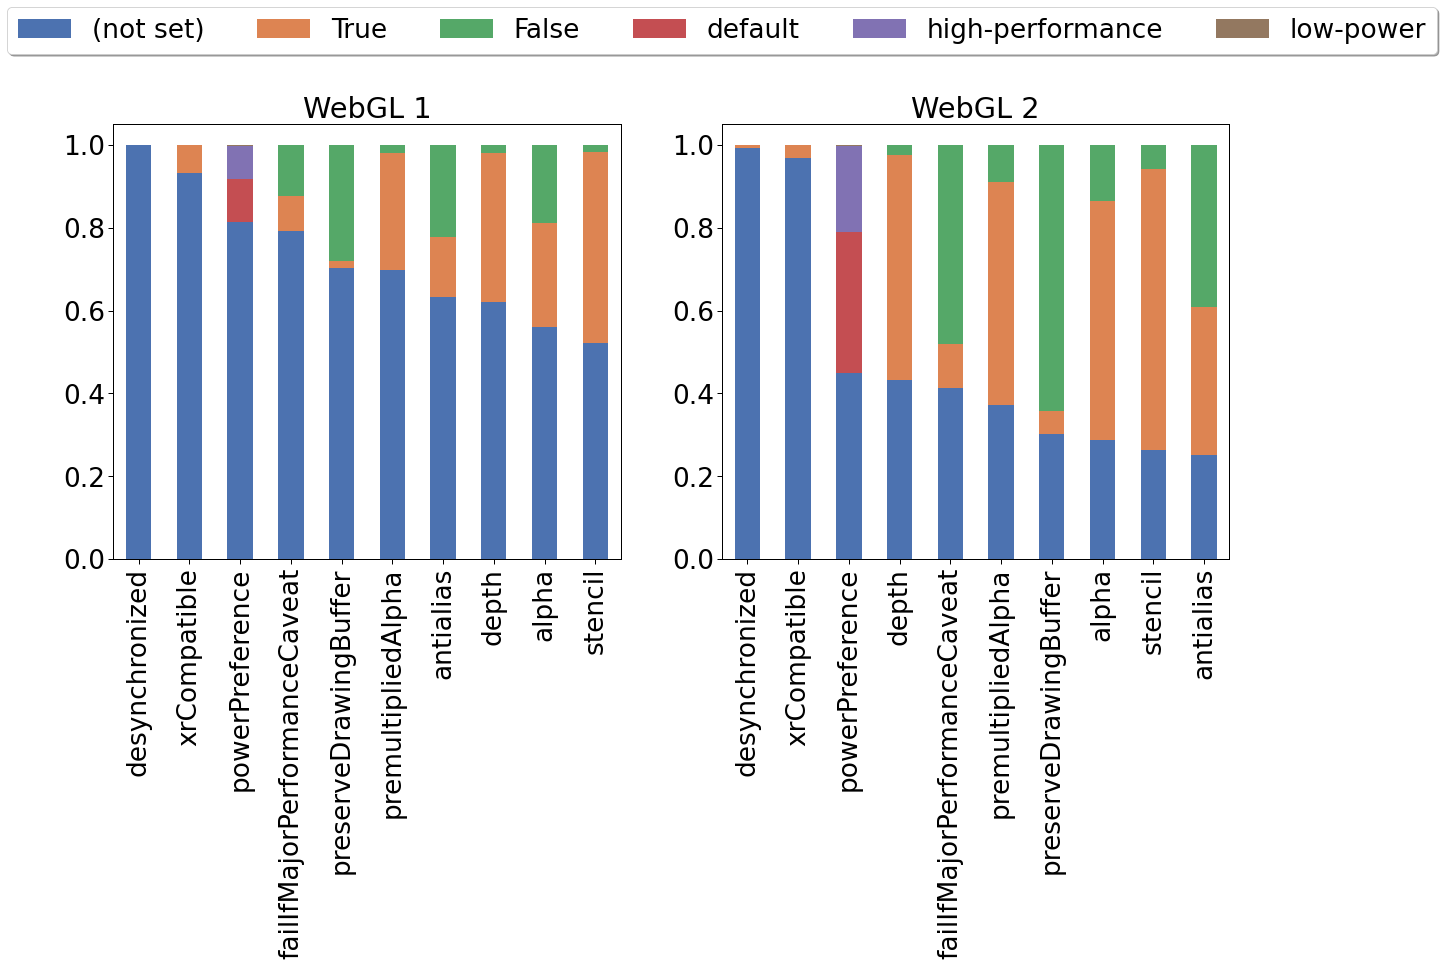

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
# plot a stacked bar chart
for i, type in enumerate(['WebGL 1', 'WebGL 2']):
    res[i].T[['not set', True, False, 'default', 'high-performance', 'low-power']].sort_values(['not set'], ascending=False).plot(kind='bar', stacked=True, ax=ax[i], legend=False)
    ax[i].set_title(type)
# results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.legend(['(not set)', True, False, 'default', 'high-performance', 'low-power'], loc='upper center', bbox_to_anchor=(0.0, 1.3), ncol=6, fancybox=True, shadow=True)
# plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

array([<Axes: ylabel='powerPreference'>], dtype=object)

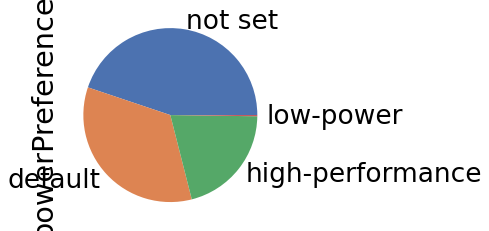

In [61]:
results[['powerPreference']].dropna().plot(kind='pie', subplots=True, legend=False)

In [63]:
# # plot a stacked bar chart
# results.drop(columns=['powerPreference', 'type']).T[['not set', True, False]].sort_values(['not set', True], ascending=False).plot(kind='barh', stacked=True, figsize=(12, 8))
# # results.T.plot(kind='barh', stacked=True, figsize=(10, 8))
# plt.legend(['not set', True, False], loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
# # plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])
# plt.savefig('fig/results_context_options.pdf', bbox_inches='tight')

# TODO:
-------

In [ ]:
df_traces_status = pd.DataFrame(list(df_traces['status']), index=df_traces.index, dtype='string')
df_traces_status = df_traces_status.add_prefix('status-')
df_traces.drop(columns=['status'], inplace=True)
df_traces = df_traces.merge(df_traces_status, left_index=True, right_index=True)

In [ ]:
tmp = df_traces['gl_info_raf'].dropna(inplace=False)
df_url = pd.DataFrame(tmp.to_list(), index=tmp.index).drop(columns=['url'])
df_url = df_traces.merge(df_url, how='left', left_index=True, right_index=True)
df_url.reset_index(inplace=True)

In [ ]:
df_url.rename(columns={
    'filename': 'instrument-filename',
    'url': 'instrument-url',
    'start_time': 'instrument-start_time',
    'duration': 'instrument-duration',
    'har': 'instrument-har',
    'accessTime': 'url-accessTime',
    'rafFuncCountList': 'url-rafFuncCountList',
    'title': 'url-title',
    'usedOffScreenCanvas': 'url-usedOffScreenCanvas',
    'when': 'url-when',
    'whenDomContentLoadedEvent': 'url-whenDomContentLoadedEvent',
    'whenLoadEvent': 'url-whenLoadEvent',
    'whenUsedWebgl': 'url-whenUsedWebgl',
}, inplace=True)

In [ ]:
df_url[df_url['instrument-url'] == 'http://frontside.com.au']

In [ ]:
df_exploded = df_url.explode('contextInfo').dropna(subset=['contextInfo'])
df_context = pd.DataFrame(list(df_exploded['contextInfo']), index=df_exploded.index).drop(columns=['triangleCount']).add_prefix('context-')
df_url.drop(columns=['contextInfo'], inplace=True)
df_context = df_url.drop(columns=['gl_info_raf']).merge(df_context, how='left', left_index=True, right_index=True)
df_context.reset_index(inplace=True, drop=True)
df_context.index.name = 'context-id'

In [ ]:
tmp = df_context['context-maghsk'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-')
tmp = df_context['context-memoryInfo'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-')
tmp = df_context['context-contextAttributes'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-attributes-')

df_context = df_context.drop(columns=['context-maghsk']).merge(df_maghsk, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-memoryInfo']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-contextAttributes']).merge(df_ctxattr, how='left', left_index=True, right_index=True)

In [ ]:
df_context = df_context.astype({
    'instrument-filename' : 'string',
    'instrument-url' : 'string',
    'instrument-start_time' : 'Float64',
    'instrument-duration' : 'Float64',
    'instrument-har' : 'object',
    'url-accessTime' : 'Float64',
    'url-rafFuncCountList' : 'object',
    'url-title' : 'string',
    'url-usedOffScreenCanvas' : 'boolean',
    'url-when' : 'Float64',
    'url-whenDomContentLoadedEvent' : 'Float64',
    'url-whenLoadEvent' : 'Float64',
    'url-whenUsedWebgl' : 'Float64',
    'context-canvasContained' : 'boolean',
    'context-canvasHidden' : 'boolean',
    'context-canvasSize' : 'object',
    'context-capturedFunctionsLength' : 'Float64',
    'context-extensions' : 'object',
    'context-programInfo' : 'object',
    'context-vertexCount' : 'Float64',
    'context-maghsk-counter' : 'object',
    'context-maghsk-createArguments' : 'object',
    'context-maghsk-createTime' : 'Float64',
    'context-maghsk-rafList' : 'object',
    'context-maghsk-pixelsRead' : 'Float64',
    'context-mem-memory' : 'object',
    'context-mem-resources' : 'object',
    'context-attributes-alpha' : 'boolean',
    'context-attributes-antialias' : 'boolean',
    'context-attributes-depth' : 'boolean',
    'context-attributes-desynchronized' : 'boolean',
    'context-attributes-failIfMajorPerformanceCaveat' : 'boolean',
    'context-attributes-powerPreference' : 'string',
    'context-attributes-premultipliedAlpha' : 'boolean',
    'context-attributes-preserveDrawingBuffer' : 'boolean',
    'context-attributes-stencil' : 'boolean',
    'context-attributes-xrCompatible' : 'boolean',
})

In [ ]:
tmp = df_context['context-maghsk-counter'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-counter-')
tmp = df_context['context-mem-memory'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-memory-')
tmp = df_context['context-mem-resources'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-mem-resources-')

df_context = df_context.drop(columns=['context-maghsk-counter']).merge(df_maghsk, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-mem-memory']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-mem-resources']).merge(df_ctxattr, how='left', left_index=True, right_index=True)

In [ ]:
# context-maghsk-counter-funcCount	context-maghsk-counter-semanticVertexCalled	context-maghsk-counter-semanticVertexCount

tmp = df_context['context-maghsk-counter-semanticVertexCalled'].dropna(inplace=False)
df_memory = pd.DataFrame(tmp.to_list(), index=tmp.index)[['0','1','2','3','4','5','6']].add_prefix('context-maghsk-counter-vertex_call-')
tmp = df_context['context-maghsk-counter-semanticVertexCount'].dropna(inplace=False)
df_ctxattr = pd.DataFrame(tmp.to_list(), index=tmp.index)[['0','1','2','3','4','5','6']].add_prefix('context-maghsk-counter-vertex_count-')
tmp = df_context['context-maghsk-counter-funcCount'].dropna(inplace=False)
df_maghsk = pd.DataFrame(tmp.to_list(), index=tmp.index).add_prefix('context-maghsk-counter-funcCount-')

df_context = df_context.drop(columns=['context-maghsk-counter-semanticVertexCalled']).merge(df_memory, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-maghsk-counter-semanticVertexCount']).merge(df_ctxattr, how='left', left_index=True, right_index=True)
df_context = df_context.drop(columns=['context-maghsk-counter-funcCount']).merge(df_maghsk, how='left', left_index=True, right_index=True)

In [ ]:
df_exploded = df_context.explode('context-programInfo').explode('context-programInfo').dropna(subset=['context-programInfo'])
df_program = pd.DataFrame(df_exploded['context-programInfo'].to_list(), index=df_exploded.index).add_prefix('context-program-')
df_context.drop(columns=['context-programInfo'], inplace=True)
df_program = df_context.merge(df_program, how='left', left_index=True, right_index=True)
df_program.reset_index(inplace=True, drop=False)
df_program.rename(columns={'index':'context-program-context_id'}, inplace=True)

In [ ]:
df_program.index.name = 'context-program-id'

In [ ]:
df_raf = df_context.dropna(subset=['context-maghsk-rafList'])[['instrument-filename', 'instrument-url', 'context-maghsk-rafList']]
df_raf

In [ ]:
df_tmp = df_raf.explode('context-maghsk-rafList').dropna(subset=['context-maghsk-rafList'])
df_raflist = pd.DataFrame(df_tmp['context-maghsk-rafList'].to_list(), index=df_tmp.index).add_prefix('rafList-')
df_raflist = df_raf.merge(df_raflist, how='left', left_index=True, right_index=True).drop(columns=['context-maghsk-rafList'])
df_raflist

In [ ]:
df_raflist[df_raflist['rafList-semanticVertexCalled'].isna()]

In [ ]:
assert df_raflist[df_raflist['rafList-semanticVertexCalled'].isna()].shape[0] == 0

In [ ]:
df_a = pd.DataFrame(df_raflist['rafList-semanticVertexCalled'].to_list(), index=df_raflist.index)[['0','1','2','3','4','5','6']].add_prefix('rafList-semanticVertexCalled-')
df_b = pd.DataFrame(df_raflist['rafList-semanticVertexCount'].to_list(), index=df_raflist.index)[['0','1','2','3','4','5','6']].add_prefix('rafList-semanticVertexCount-')
df_c = pd.DataFrame(df_raflist['rafList-funcCount'].to_list(), index=df_raflist.index).add_prefix('rafList-funcCount-')

In [ ]:
# concat df_a, df_b, df_c
df_raflist_abc = pd.concat([df_raflist, df_a, df_b, df_c], axis=1)
df_raflist_abc.drop(columns=['rafList-funcCount', 'rafList-semanticVertexCalled', 'rafList-semanticVertexCount'], inplace=True)
df_raflist_abc

In [ ]:
rename_dict = {}
for i in range(7):
    rename_dict[f'rafList-semanticVertexCalled-{i}'] = f'rafList-semanticVertexCalled-{gl_types[i]}'
    rename_dict[f'rafList-semanticVertexCount-{i}'] = f'rafList-semanticVertexCount-{gl_types[i]}'
df_raflist_abc.rename(columns=rename_dict, inplace=True)
df_raflist_abc

In [ ]:
# df_raflist_abc group by context-id and shift and minus
df_tmp = df_raflist_abc.drop(columns=['instrument-filename', 'instrument-url', 'rafList-when'])
df_tmp = df_tmp.groupby('context-id').shift(0) - df_tmp.groupby('context-id').shift(1)
# df_tmp.dropna(subset=['rafList-bufferDataSent'], inplace=True)
df_tmp_groupby = df_tmp.groupby('context-id')

In [ ]:
df_raf_stat = df_tmp_groupby.agg(['mean', 'std', 'count'])

In [ ]:
df_raf_stat_subset = df_raf_stat[['rafList-semanticVertexCalled-POINTS', 'rafList-semanticVertexCalled-LINES', 'rafList-semanticVertexCalled-LINE_LOOP', 'rafList-semanticVertexCalled-LINE_STRIP', 'rafList-semanticVertexCalled-TRIANGLES', 'rafList-semanticVertexCalled-TRIANGLE_STRIP', 'rafList-semanticVertexCalled-TRIANGLE_FAN', 'rafList-semanticVertexCount-POINTS', 'rafList-semanticVertexCount-LINES', 'rafList-semanticVertexCount-LINE_LOOP', 'rafList-semanticVertexCount-LINE_STRIP', 'rafList-semanticVertexCount-TRIANGLES', 'rafList-semanticVertexCount-TRIANGLE_STRIP', 'rafList-semanticVertexCount-TRIANGLE_FAN']]
df_raf_stat_subset

# Save to disk

In [ ]:
pickle_output_path = Path('output/pickle')
excel_output_path = Path('output/excel')

In [ ]:
pickle_output_path.mkdir(parents=True, exist_ok=True)
excel_output_path.mkdir(parents=True, exist_ok=True)

In [ ]:
# save to pickle first
df_url.to_pickle(pickle_output_path / '0417-raf_url.pkl.zstd', compression='zstd')
df_context.to_pickle(pickle_output_path / '0417-raf_context.pkl.zstd', compression='zstd')
df_program.to_pickle(pickle_output_path / '0417-raf_program.pkl.zstd', compression='zstd')
df_raflist_abc.to_pickle(pickle_output_path / '0417-raf_raflist_abc.pkl.zstd', compression='zstd')
df_raf_stat.to_pickle(pickle_output_path / '0417-raf_stat.pkl.zstd', compression='zstd')

In [ ]:
# df_url.to_excel(excel_output_path / '0417-raf_url.xlsx', index=True)
# df_context.to_excel(excel_output_path / '0417-raf_context.xlsx', index=True)
# df_raf_stat_subset.to_excel(excel_output_path / '0417-raf_stat_subset.xlsx', index=True)